**Swiggy Sales Analysis**

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load the Data

df = pd.read_excel('/content/swiggy_data.xlsx')

In [3]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [4]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


Metadata

In [5]:
df.shape

(197430, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [7]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


**KPI's**

1. Total Sales

In [8]:
total_sales = df['Price (INR)'].sum()

print('Total Sales(INR):',round(total_sales,2))

Total Sales(INR): 53012505.77


2. Average Rating

In [9]:
avg_rating = df['Rating'].mean()

print('Average Rating:',round(avg_rating,1))

Average Rating: 4.3


3.Average Order Value

In [10]:
avg_order_value = df['Price (INR)'].mean()

print('Average Order Value:',round(avg_order_value,2))

Average Order Value: 268.51


4. Ratings Count

In [11]:
ratings_count = df['Rating Count'].sum()

print('Rating Count:',ratings_count)



Rating Count: 5591574


5. Total Orders

In [12]:
total_orders = len(df)

print('Total Orders:',total_orders)

Total Orders: 197430


**Charts Designs**

Monthly Sales Trend

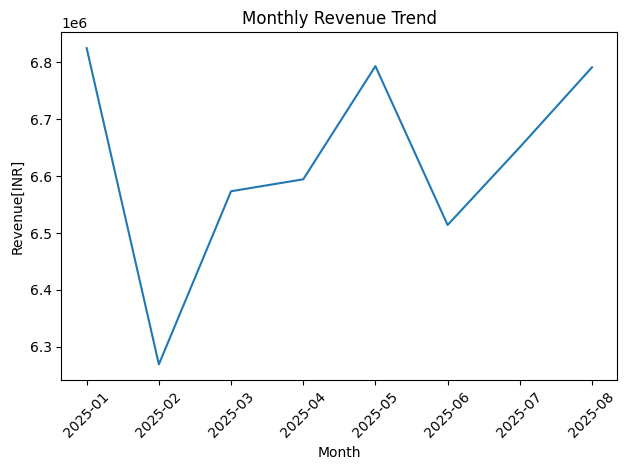

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('YearMonth')['Price (INR)'].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue['YearMonth'],monthly_revenue['Price (INR)'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue[INR]')
plt.title('Monthly Revenue Trend')
plt.tight_layout()
plt.show()

Daily Sales Trend

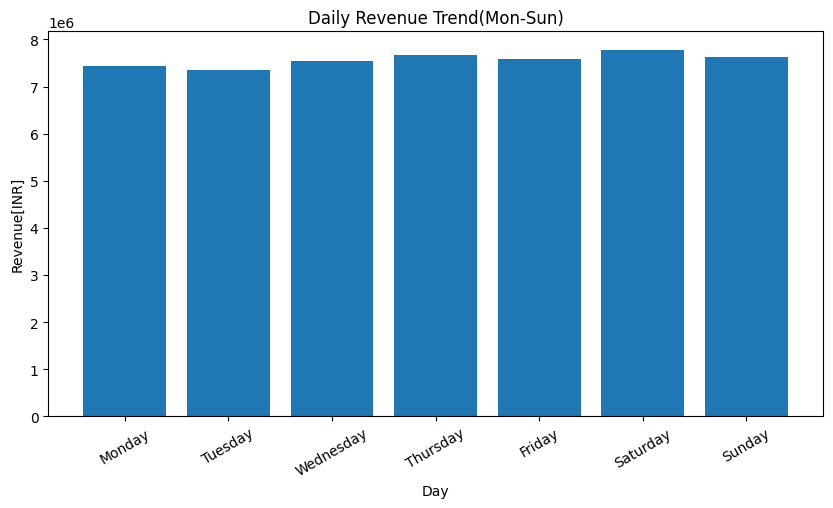

In [14]:
df['DayName'] = pd.to_datetime(df['Order Date']).dt.day_name()

daily_revenue =(
         df.groupby('DayName')['Price (INR)']
       .sum()
       .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

)

plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index,daily_revenue.values)
plt.title('Daily Revenue Trend(Mon-Sun)')
plt.xlabel('Day')
plt.ylabel('Revenue[INR]')
plt.xticks(rotation=30)

plt.show()

Total Sales by Food(Veg vs Non-Veg)

In [15]:
non_veg_keyword = [
    'chicken','egg','fish','mutton',
    'prawn','biriyani','kabab','kebab',
    'non-veg','non veg'
]

df['Food Category'] = np.where(
    df['Dish Name'].str.lower().str.contains('|'.join(non_veg_keyword),na=False),
    'Non-Veg',
    'Veg'
    )

In [16]:
food_revenue = (
    df.groupby('Food Category')['Price (INR)']
    .sum()
    .reset_index()
)

In [21]:
fig = px.pie(
    food_revenue,
    values='Price (INR)',
    names='Food Category',
    hole= 0.5,
    title='Revenue Contribution: Veg vs Non-veg',
)

fig.update_traces(
    textinfo = 'percent+label',
    pull=[0.05,0]
)

fig.update_layout(
    height =500,
    margin=dict(t=60, b=40, l=40, r=40)
)

fig.show()


Total Sales by State

In [25]:

fig = px.bar(
    df.groupby('State',as_index=False)['Price (INR)']
    .sum()
    .sort_values('Price (INR)',ascending=False),
    x='Price (INR)',
    y='State',
    orientation='h',
    title='Revenue by State(INR)'

)

fig.update_layout(height=600,yaxis=dict(autorange='reversed'))
fig.show()

Quarterly Performance Summary

In [27]:
from numpy._core.defchararray import index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

quarterly_summary = (
    df.groupby('Quarter', as_index=False)
    .agg(
        total_sales =('Price (INR)','sum'),
        avg_rating = ('Rating','mean'),
        total_orders = ('Order Date','count')
    )
    .sort_values('Quarter')

)

quarterly_summary['total_sales'] = quarterly_summary['total_sales'].round(0)
quarterly_summary['avg_rating'] = quarterly_summary['avg_rating'].round(2)

quarterly_summary


,Quarter,total_sales,avg_rating,total_orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


Top 5 Cities by Sales

In [30]:
top_5_cities=(
   df.groupby('City')['Price (INR)']
    .sum()
    .nlargest(5)
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x='Price (INR)',
    y='City',
    orientation='h',
    title='Top 5 Cities by Sales(INR)',
    color_discrete_sequence=['red']
)


fig.show()

Weekly Trend Analysis

In [31]:

# 1. Ensure datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. Create Year-Week (prevents week overlap across years)
df['Year_Week'] = df['Order Date'].dt.to_period('W')

# 3. Weekly aggregation
weekly_summary = (
    df.groupby('Year_Week', as_index=False)
      .agg(
          total_sales=('Price (INR)', 'sum'),
          avg_rating=('Rating', 'mean'),
          total_orders=('Order Date', 'count')
      )
      .sort_values('Year_Week')
)

# 4. Smooth trend using 4-week moving average
weekly_summary['sales_4w_ma'] = (
    weekly_summary['total_sales']
    .rolling(window=4)
    .mean()
)

# 5. Formatting
weekly_summary['Year_Week'] = weekly_summary['Year_Week'].astype(str)
weekly_summary['total_sales'] = weekly_summary['total_sales'].round(0)
weekly_summary['avg_rating'] = weekly_summary['avg_rating'].round(2)
weekly_summary['sales_4w_ma'] = weekly_summary['sales_4w_ma'].round(0)

weekly_summary


,Year_Week,total_sales,avg_rating,total_orders,sales_4w_ma
0,2024-12-30/2025-01-05,1101057.0,4.34,4143,NaN
1,2025-01-06/2025-01-12,1543434.0,4.35,5698,NaN
2,2025-01-13/2025-01-19,1512362.0,4.34,5672,NaN
3,2025-01-20/2025-01-26,1540131.0,4.34,5735,1424246.0
4,2025-01-27/2025-02-02,1549637.0,4.35,5737,1536391.0
5,2025-02-03/2025-02-09,1517262.0,4.34,5591,1529848.0
6,2025-02-10/2025-02-16,1560241.0,4.34,5763,1541818.0
7,2025-02-17/2025-02-23,1697993.0,4.33,6298,1581283.0
8,2025-02-24/2025-03-02,1491166.0,4.34,5609,1566666.0
9,2025-03-03/2025-03-09,1472958.0,4.34,5453,1555590.0
